In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\asus\OneDrive\Documents\PASD\DATA RUMAH TEBET.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


In [18]:
df = df.loc[:,['LB', 'LT', 'KT', 'KM', 'GRS', 'HARGA']]
df.head()

,LB,LT,KT,KM,GRS,HARGA
0,220,220,3,3,0,3800000000
1,180,137,4,3,2,4600000000
2,267,250,4,4,4,3000000000
3,40,25,2,2,0,430000000
4,400,355,6,5,3,9000000000


### **Menentukan Variabel X (Independent) dan Y (Dependen)**

In [19]:
x = df.drop(columns=['HARGA'])
y = df['HARGA']

### OLS Regression Result

In [25]:
import statsmodels.api as sm

# adding a constant variable
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HARGA   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     506.8
Date:                Thu, 08 May 2025   Prob (F-statistic):          1.25e-271
Time:                        13:31:14   Log-Likelihood:                -23740.
No. Observations:                1010   AIC:                         4.749e+04
Df Residuals:                    1004   BIC:                         4.752e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.417e+08      4e+08     -1.856      0.064   -1.53e+09    4.27e+07
LB          1.232e+07   1.14e+06     10.824      0.000    1.01e+07    1.46e+07
LT          2.366e+07   1.06e+06     22.221      0.000    2.16e+07    2.57e+07
KT         -6.195e+08   1.09e+08     -5.686      0.000   -8.33e+08   -4.06e+08
KM          4.555e+08   1.27e+08      3.598      0.000    2.07e+08    7.04e+08
GRS           3.1e+08   9.66e+07      3.209      0.001     1.2e+08    4.99e+08
==============================================================================
Omnibus:                      908.406   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98134.485
Skew:                           3.611   Prob(JB):                         0.00
Kurtosis:                      50.747   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Uji Normalitas

Dalam uji normalitas, kita menggunakan nilai **Prob Jarque Bera (JB)** dari hasil uji di atas sebesar **0.00**. Dengan hipotesis sebagai berikut:

## Menentukan Hipotesis
- **H0** : Residual berdistribusi normal  
- **H1** : Residual tidak berdistribusi normal

## Tingkat Signifikansi
- ∝ = 5% (∝ = 0.05)

## Statistik Uji
- p-value = 0.00

## Daerah Kritis
- Tolak H0 jika p-value < α

## Keputusan
- Karena p-value sama dengan 0.00, di mana p-value < α yaitu 0.00 < 0.05, maka **tolak H0**.

## Kesimpulan
- Pada dataset ini, data **tidak berdistribusi normal**.


## Uji Multikolinearitas

In [22]:
from patsy import dmatrices
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = smf.ols(formula = "HARGA~LB+LT+KT+KM+GRS", data = df).fit()
Y,X = dmatrices ("HARGA~LB+LT+KT+KM+GRS", data = df, return_type ="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
print(vif)

[10.500700619760497, 2.6902235160668386, 2.4102909422599326, 1.9280243602936884, 2.1222604720799554, 1.398235535323092]


# Uji Multikolinearitas

Uji multikolinearitas dilakukan untuk menunjukkan apakah terdapat korelasi antar variabel independen dalam regresi linear berganda.

## Menentukan Hipotesis
- **H0** : VIF < 10 berarti tidak ada multikolinearitas  
- **H1** : VIF > 10 berarti terdapat multikolinearitas

## Tingkat Signifikansi
- ∝ = 5% (∝ = 0.05)

## Statistik Uji
- VIF :
  - Constant = 10,500
  - LB = 2,690
  - LT = 2,410
  - KT = 1,928
  - Miles (KM) = 2,122
  - GRS = 2,122

## Daerah Kritis
- Tolak H0 jika VIF > ∝

## Keputusan
- Karena nilai VIF (LB = 2,690, LT = 2,410, KT = 1,928, KM = 2,122, dan GRS = 2,122) < 10, maka **gagal menolak H0**.

## Kesimpulan
- Dengan demikian, dataset ini **tidak memiliki multikolinearitas**.


## Uji Heteroskedastisitas

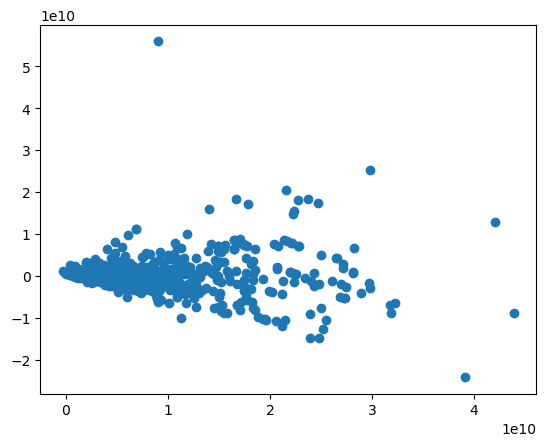

In [23]:
lm=smf.ols(formula="HARGA~LB+LT+KT+KM+GRS",data=df).fit()
lm
resid=lm.resid
plt.scatter(lm.predict(),resid)

In [24]:
import statsmodels.stats as stats

stats.diagnostic.het_white(resid, lm.model.exog)

(137.16019937750238,
 1.746217253024452e-19,
 7.770694982493068,
 4.274750011792794e-21)

Berdasarkan hasil uji heteroskedastisitas, dapat dilihat bahwa titik-titik tidak membentuk pola yang jelas. Titik-titik tersebar di atas dan di bawah angka 0 pada sumbu Y.
Kesimpulan: Dengan demikian, dapat disimpulkan bahwa **tidak terdapat masalah heteroskedastisitas** pada model regresi ini.


# Uji Parsial (Uji t)

Uji parsial digunakan untuk menentukan apakah variabel independen (X) memiliki pengaruh signifikan (nyata) terhadap variabel dependen (Y).

## Hipotesis
- **H0** : βi = 0, i = 0,1,2 (Tidak ada pengaruh signifikan antara X dan Y)  
- **H1** : βi ≠ 0, i = 0,1,2 (Ada pengaruh signifikan antara X dan Y)

## Tingkat Signifikansi
- ∝ = 5% (0.05)

## Daerah Kritis
- Jika p-value ≤ ∝ (0.05) → Tolak H0

## Statistik Uji (p-value)
Hasil dari **OLS Regression Results**
- Constant = 0.064  
- LB = 0.000  
- LT = 0.000  
- KT = 0.000  
- KM = 0.000  
- GRS = 0.001

## Keputusan
- Karena p-value untuk β1, β2, β3, β4, β5 < ∝, maka **tolak H0**.

## Kesimpulan
- Dalam dataset ini terdapat **pengaruh signifikan** antara variabel X (LB, LT, KT, KM, GRS) terhadap variabel Y (Harga).


# Manfaat Pengujian dalam Pengembangan Model Regresi Prediksi Harga Rumah

Dalam membangun model regresi yang baik, penting untuk memastikan bahwa model memenuhi asumsi-asumsi dasar. Berikut manfaat dari masing-masing uji yang telah dilakukan:

---

## 1️⃣ Uji Normalitas
- **Manfaat:** Memastikan bahwa residual (error) berdistribusi normal.  
  Ini penting karena banyak uji statistik (seperti uji t, uji F) mengasumsikan residual normal agar hasilnya valid.  
  Jika tidak normal, maka prediksi dan interval kepercayaannya mungkin tidak akurat.

---

## 2️⃣ Uji Multikolinearitas
- **Manfaat:** Memastikan bahwa antar variabel independen (misal: luas bangunan, luas tanah, jumlah kamar, jarak ke pusat kota) **tidak saling berkorelasi terlalu kuat**.  
  Jika terjadi multikolinearitas, maka:
  - Interpretasi koefisien regresi jadi tidak jelas.
  - Variabel penting bisa terlihat tidak signifikan.
  Dengan VIF < 10, kita yakin bahwa variabel yang digunakan berdiri sendiri dan memberi kontribusi unik.

---

## 3️⃣ Uji Heteroskedastisitas
- **Manfaat:** Memastikan bahwa **varian residual** konstan pada semua tingkat prediksi (homoskedastisitas).  
  Jika ada heteroskedastisitas (varian berubah-ubah), maka:
  - Estimasi standar error tidak akurat.
  - Uji signifikansi menjadi tidak valid.
  Dengan tidak adanya heteroskedastisitas, model lebih stabil dan andal untuk memprediksi harga rumah di berbagai kondisi.

---

## 4️⃣ Uji Parsial (Uji t)
- **Manfaat:** Menguji **signifikansi masing-masing variabel independen** secara individual.  
  Misalnya, apakah luas bangunan secara signifikan memengaruhi harga, apakah jumlah kamar signifikan, dan seterusnya.
  Hasil ini membantu memilih variabel mana yang penting dipertahankan dalam model, sehingga:
  - Model lebih sederhana.
  - Menghindari overfitting.
  - Fokus pada variabel yang benar-benar memengaruhi harga.

---

# Kesimpulan Umum
Dengan melakukan serangkaian pengujian ini, pengembang model dapat:
✅ Memastikan model memenuhi asumsi statistik utama.  
✅ Memperbaiki kualitas prediksi dan interpretasi.  
✅ Menghindari masalah teknis seperti bias, varians tinggi, atau variabel yang tidak relevan.  
✅ Membangun model regresi yang lebih **akurat, stabil, dan dapat diandalkan** untuk memprediksi harga rumah di masa depan.

